## Python Program: Remap, Downsample and Plot MODIS/Terra Sea-ice by Reflectance
**THIS IS THE SECOND DEMO.**

In [1]:
from pyhdf import SD
from pyhdf import HDF
import glob
import numpy as np

## 1. Load MODIS Granules and Get the locations

In [2]:
import os
os.getcwd()

'C:\\Users\\kathy\\research\\Sea-ice-concentration\\p_pro'

In [3]:
os.chdir('C:/Users/kathy/research/Sea-ice-concentration/data/MODIS/Terra/20080702/78/')
print(os.getcwd())
os.listdir()

C:\Users\kathy\research\Sea-ice-concentration\data\MODIS\Terra\20080702\78


['MOD29P1D.A2008184.h08v08.006.2015176145319.hdf',
 'MOD29P1D.A2008184.h08v09.006.2015176145929.hdf',
 'MOD29P1D.A2008184.h08v10.006.2015176145708.hdf',
 'MOD29P1D.A2008184.h09v08.006.2015176145941.hdf',
 'MOD29P1D.A2008184.h09v09.006.2015176150050.hdf',
 'MOD29P1D.A2008184.h09v10.006.2015176145905.hdf',
 'MOD29P1D.A2008184.h10v08.006.2015176145934.hdf',
 'MOD29P1D.A2008184.h10v09.006.2015176150001.hdf',
 'MOD29P1D.A2008184.h10v10.006.2015176145929.hdf']

In [4]:
f = []
for file in os.listdir(os.getcwd()):
    if file.endswith(".hdf"):
        f.append(os.path.join(os.getcwd(), file)) 
        print(os.path.join(os.getcwd(), file))

C:\Users\kathy\research\Sea-ice-concentration\data\MODIS\Terra\20080702\78\MOD29P1D.A2008184.h08v08.006.2015176145319.hdf
C:\Users\kathy\research\Sea-ice-concentration\data\MODIS\Terra\20080702\78\MOD29P1D.A2008184.h08v09.006.2015176145929.hdf
C:\Users\kathy\research\Sea-ice-concentration\data\MODIS\Terra\20080702\78\MOD29P1D.A2008184.h08v10.006.2015176145708.hdf
C:\Users\kathy\research\Sea-ice-concentration\data\MODIS\Terra\20080702\78\MOD29P1D.A2008184.h09v08.006.2015176145941.hdf
C:\Users\kathy\research\Sea-ice-concentration\data\MODIS\Terra\20080702\78\MOD29P1D.A2008184.h09v09.006.2015176150050.hdf
C:\Users\kathy\research\Sea-ice-concentration\data\MODIS\Terra\20080702\78\MOD29P1D.A2008184.h09v10.006.2015176145905.hdf
C:\Users\kathy\research\Sea-ice-concentration\data\MODIS\Terra\20080702\78\MOD29P1D.A2008184.h10v08.006.2015176145934.hdf
C:\Users\kathy\research\Sea-ice-concentration\data\MODIS\Terra\20080702\78\MOD29P1D.A2008184.h10v09.006.2015176150001.hdf
C:\Users\kathy\research\

#### **1.1 Get locations of the 4 corners**

In [5]:
lon = []
lat = []
n = 1
for filename in f:
   
    print('Granule '+ str(n) +':')
    # Read attributes
    hdf_obj = SD.SD(filename,SD.SDC.READ)
    mdata = hdf_obj.attributes()['CoreMetadata.0']

    # Read Lon
    st = mdata.find('OBJECT                 = GRINGPOINTLONGITUDE')
    sp = mdata.find('OBJECT                 = GRINGPOINTLATITUDE')

    lon0 = float(mdata[st:sp].split(', ')[0].split('(')[-1]) 
    lon1 = float(mdata[st:sp].split(', ')[1])
    lon2 = float(mdata[st:sp].split(', ')[2])
    lon3 = float(mdata[st:sp].split(', ')[3].split(')')[0])
    lon.append([lon0,lon1,lon2,lon3])

    print('lon:',lon0,lon1,lon2,lon3)

    # Read lat
    st = mdata.find('OBJECT                 = GRINGPOINTLATITUDE')
    sp = mdata.find('OBJECT                 = GRINGPOINSEQUENCENO')

    lat0 = float(mdata[st:sp].split(', ')[0].split('(')[-1]) 
    lat1 = float(mdata[st:sp].split(', ')[1])
    lat2 = float(mdata[st:sp].split(', ')[2])
    lat3 = float(mdata[st:sp].split(', ')[3].split(')')[0])
    lat.append([lat0,lat1,lat2,lat3])

    print('lat:',lat0,lat1,lat2,lat3,'\n')
    
    n = n+1

Granule 1:
lon: -135.0 -161.565051177078 -135.0 -108.434948822922
lat: 71.7316687660085 76.4093548376422 83.9334841549555 76.4093548376422 

Granule 2:
lon: -108.434948822922 -135.0 -45.0 -71.565051177078
lat: 76.4093548376422 83.9334841549555 83.9334841549555 76.4093548376422 

Granule 3:
lon: -71.565051177078 -45.0 -18.434948822922 -45.0
lat: 76.4093548376422 83.9334841549555 76.4093548376422 71.7316687660085 

Granule 4:
lon: -161.565051177078 161.565051177078 135.0 -135.0
lat: 76.4093548376422 76.4093548376422 83.9334841549555 83.9334841549555 

Granule 5:
lon: -135.0 135.0 45.0 -45.0
lat: 83.9334841549555 83.9334841549555 83.9334841549555 83.9334841549555 

Granule 6:
lon: -45.0 45.0 18.434948822922 -18.434948822922
lat: 83.9334841549555 83.9334841549555 76.4093548376422 76.4093548376422 

Granule 7:
lon: 161.565051177078 135.0 108.434948822922 135.0
lat: 76.4093548376422 71.7316687660085 76.4093548376422 83.9334841549555 

Granule 8:
lon: 135.0 108.434948822922 71.565051177078 45

#### **1.2 Access variable: Sea_Ice_by_Reflectance**

In [6]:
SIbR = []
i = 0

for filename in f:

    hdf_obj = SD.SD(filename,SD.SDC.READ)
    SIbR.append(list(hdf_obj.select('Sea_Ice_by_Reflectance')))  # SDS强制类型转换为list
    
    i = i+1

SIbR = np.array(SIbR)
print(SIbR.shape)

SIbR_c = np.copy(SIbR)

(9, 951, 951)


#### **1.3 Read attribute: surface type**

In [7]:
surface_type = hdf_obj.select('Sea_Ice_by_Reflectance').Key.split(', ')
print(surface_type)

['0=missing data', '1=no decision', '11=night', '25=land', '37=inland water', '39=ocean', '50=cloud', '200=sea ice', '253=land mask', '254=ocean mask', '255=fill']


### **2. Plot the image**

In [8]:
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

cmap = ListedColormap(['red', 
                       'green', 
                       'gray',
                       'darkgray',
                       'cyan',
                       'blue',
                       'black',
                       'ivory',
                       'darkorange',
                       'purple',
                       'yellow',
                       'lightgreen'])

bounds = np.linspace(0,11,12)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

In [9]:
SIbR[SIbR == 0] = 0
SIbR[SIbR == 1] = 1
SIbR[SIbR == 11] = 2
SIbR[SIbR == 25] = 3
SIbR[SIbR == 37] = 4
SIbR[SIbR == 39] = 5
SIbR[SIbR == 50] = 6
SIbR[SIbR == 200] = 7
SIbR[SIbR == 253] = 8
SIbR[SIbR == 254] = 9
SIbR[SIbR == 255] = 10

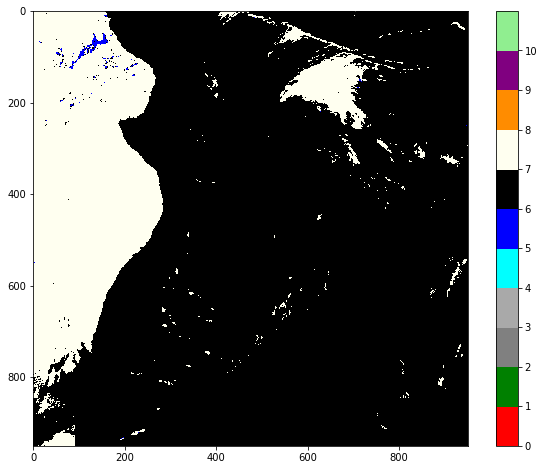

In [10]:
fig,ax = plt.subplots(figsize=(10, 8))

im = ax.imshow(SIbR[3], cmap = cmap, norm=norm)
cbar = plt.colorbar(im,ticks = np.arange(0,11,1),orientation='vertical')

# plt.plot(476,950+462, 'ro')
# plt.plot(950+462,950+950+462, 'ro')
# plt.plot(950+950+462,950+462, 'ro')
# plt.plot(950+462,476, 'ro')

### **Map2: Lambert Azimuthal Equal Area Projection**

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

''

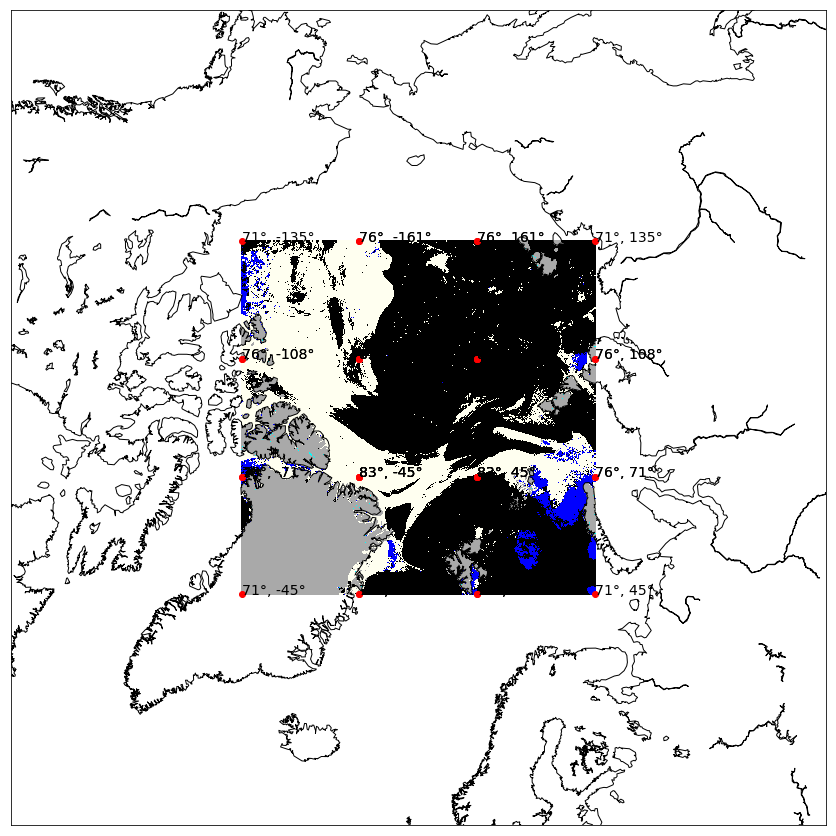

In [12]:
fig = plt.figure(figsize=(15,15))
m = Basemap(resolution='l',projection='nplaea',boundinglat=60.,lon_0=0.)

m.drawcoastlines()
# m.fillcontinents(color='silver',lake_color='aqua')

for i in range(0,9):
    
    x0,y0 = m(lon[i][0],lat[i][0])
    m.plot(x0,y0,'ro')
    x1,y1 = m(lon[i][1],lat[i][1])
    m.plot(x1,y1,'ro')
    x2,y2 = m(lon[i][2],lat[i][2])
    m.plot(x2,y2,'ro')
    x3,y3 = m(lon[i][3],lat[i][3])
    m.plot(x3,y3,'ro')
    
#     print(lon[i][0],lat[i][0])
#     print('x0',x0,'x1',x1,'x2',x2,'x3',x3)
#     print((x1-x0)/1000.)
#     print('y0',y0,'y1',y1,'y2',y2,'y3',y3, '\n')

#     m.plot(np.linspace(x0,x1),np.linspace(y0,y1),c='b')
#     m.plot(np.linspace(x1,x2),np.linspace(y1,y2),c='b')
#     m.plot(np.linspace(x2,x3),np.linspace(y2,y3),c='b')
#     m.plot(np.linspace(x3,x0),np.linspace(y3,y0),c='b')

    plt.text(x0,y0,str(int(lat[i][0]))+'°, '+str(int(lon[i][0]))+'°',fontsize=14)
    plt.text(x1,y1,str(int(lat[i][1]))+'°, '+str(int(lon[i][1]))+'°',fontsize=14)
    plt.text(x2,y2,str(int(lat[i][2]))+'°, '+str(int(lon[i][2]))+'°',fontsize=14)
    plt.text(x3,y3,str(int(lat[i][3]))+'°, '+str(int(lon[i][3]))+'°',fontsize=14)


    '''
    Interpolating and creating (xi,yi) of each grid cell
    '''
    # xi_tm = np.linspace(x0,x1,951)
    # yi_tm = np.linspace(y3,y0,951)

    xi_tm = np.arange(x0,x1,1002.7010)
    yi_tm = np.arange(y3,y0,1002.7010)
    xi_tm,yi_tm = np.meshgrid(xi_tm,yi_tm)

    '''
    Inverse process to get (loni,lati) of each grid cell
    '''
    loni,lati = m(xi_tm,yi_tm, inverse=True)

#     print(yi_tm.min(),lati.min(),lati.max())
#     print(xi_tm.min(),loni.min(),loni.max())

    SIbR_f = np.flip(SIbR[i],0)
    m.pcolormesh(xi_tm,yi_tm, SIbR_f,cmap = cmap, norm = norm)
# m.pcolormesh(lon,lat, SIbR,cmap = cmap, norm = norm, latlon=True)
# m.imshow(SIbR, extent = extent, cmap = cmap, norm = norm);
;

#### **2.1 show the stitched image**

In [13]:
temp0 = np.reshape(SIbR_c[0:3],(951*3,-1))
temp1 = np.reshape(SIbR_c[3:6],(951*3,-1))
temp2 = np.reshape(SIbR_c[6:9],(951*3,-1))

stitch_c = np.concatenate((temp0,temp1,temp2),axis=1)
stitch_c.shape

(2853, 2853)

In [14]:
temp0 = np.reshape(SIbR[0:3],(951*3,-1))
temp1 = np.reshape(SIbR[3:6],(951*3,-1))
temp2 = np.reshape(SIbR[6:9],(951*3,-1))

stitch = np.concatenate((temp0,temp1,temp2),axis=1)
stitch.shape

(2853, 2853)

1867569.6032276626 71.7316687660085 89.99428322894595
1867569.6032276626 -179.98198273934304 179.97782525900996


''

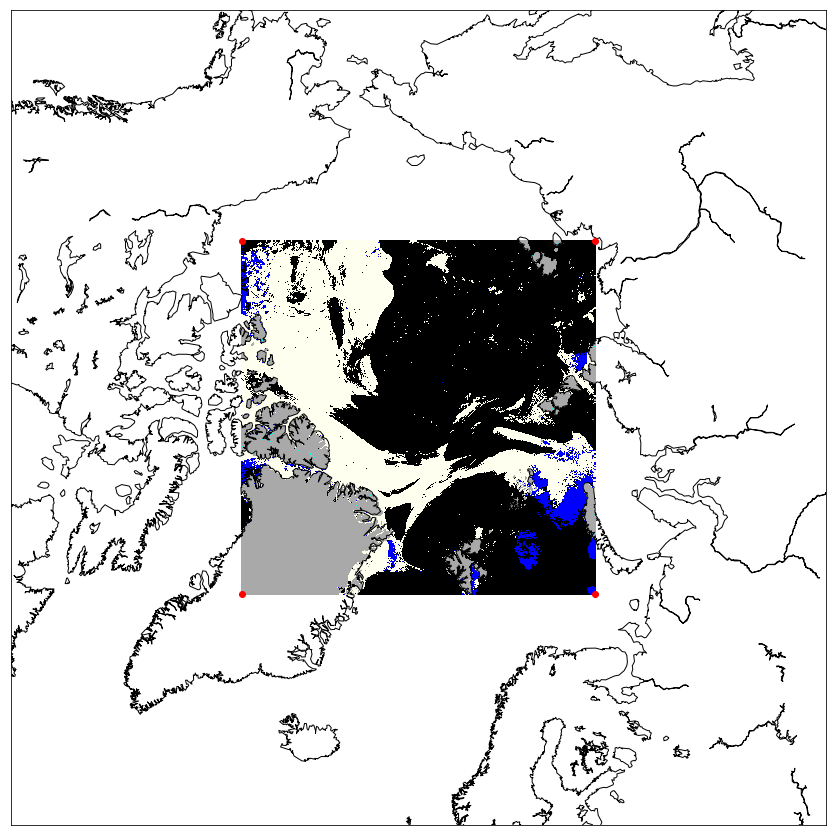

In [15]:
fig = plt.figure(figsize=(15,15))
m = Basemap(resolution='l',projection='nplaea',boundinglat=60.,lon_0=0.)

m.drawcoastlines()
# m.fillcontinents(color='silver',lake_color='aqua')

    
x0,y0 = m(lon[0][0],lat[0][0])
m.plot(x0,y0,'ro')
x1,y1 = m(lon[6][1],lat[6][1])
m.plot(x1,y1,'ro')
x2,y2 = m(lon[8][2],lat[8][2])
m.plot(x2,y2,'ro')
x3,y3 = m(lon[2][3],lat[2][3])
m.plot(x3,y3,'ro')

# plt.text(x0,y0,str(int(lat[i][0]))+'°, '+str(int(lon[i][0]))+'°',fontsize=14)
# plt.text(x1,y1,str(int(lat[i][1]))+'°, '+str(int(lon[i][1]))+'°',fontsize=14)
# plt.text(x2,y2,str(int(lat[i][2]))+'°, '+str(int(lon[i][2]))+'°',fontsize=14)
# plt.text(x3,y3,str(int(lat[i][3]))+'°, '+str(int(lon[i][3]))+'°',fontsize=14)


'''
Interpolating and creating (xi,yi) of each grid cell
'''
# xi_tm = np.linspace(x0,x1,951)
# yi_tm = np.linspace(y3,y0,951)

xi_tm = np.arange(x0,x1,1002.7010)
yi_tm = np.arange(y3,y0,1002.7010)
xi_tm,yi_tm = np.meshgrid(xi_tm,yi_tm)

'''
Inverse process to get (loni,lati) of each grid cell
'''
loni,lati = m(xi_tm,yi_tm, inverse=True)

print(yi_tm.min(),lati.min(),lati.max())
print(xi_tm.min(),loni.min(),loni.max())

stitch_f = np.flip(stitch,0)
m.pcolormesh(xi_tm,yi_tm,stitch_f,cmap = cmap, norm = norm)
# m.pcolormesh(lon,lat, SIbR,cmap = cmap, norm = norm, latlon=True)
;

### **3. Grid Reprojection**

#### **3.1 Load 6.25km lon & lat grid,** **Load UB ASI SIC map**

In [16]:
os.getcwd()

'C:\\Users\\kathy\\research\\Sea-ice-concentration\\data\\MODIS\\Terra\\20080702\\78'

In [17]:
# os.chdir('C:/Users/kathy/research/Sea-ice-concentration/data/UB/sic/')
os.chdir('C:/Users/kathy/research/Sea-ice-concentration/data/UB/geodata/')
# print(os.getcwd())
# os.listdir()

f = []
for file in os.listdir(os.getcwd()):
    if file.endswith(".hdf"):
        f.append(os.path.join(os.getcwd(), file)) 
        print(os.path.join(os.getcwd(), file))

C:\Users\kathy\research\Sea-ice-concentration\data\UB\geodata\LongitudeLatitudeGrid-n6250-Arctic.hdf
C:\Users\kathy\research\Sea-ice-concentration\data\UB\geodata\north_lat_6km.hdf
C:\Users\kathy\research\Sea-ice-concentration\data\UB\geodata\north_lon_6km.hdf


In [18]:
filename = f[1]
filename = f[0]

hdf_obj = SD.SD(filename,SD.SDC.READ)
key = hdf_obj.datasets().keys()
print (key, '\n')

dict_keys(['Longitudes', 'Latitudes']) 



In [19]:
Lon6 = list(hdf_obj.select('Longitudes'))
Lat6 = list(hdf_obj.select('Latitudes'))
Lon6 = np.array(Lon6)
Lat6 = np.array(Lat6)

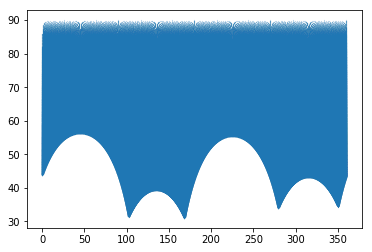

In [20]:
plt.scatter(Lon6, Lat6, s=0.01)

Text(0, 0.5, 'lat')

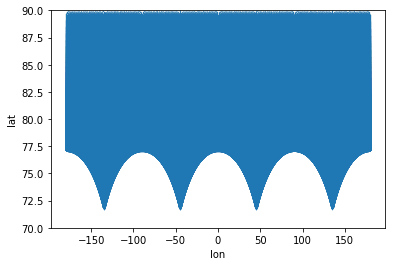

In [23]:
plt.scatter(loni,lati, s=0.01)
plt.ylim([70, 90])
plt.xlabel('lon')
plt.ylabel('lat')

In [19]:
SIC = list(hdf_obj.select('ASI Ice Concentration'))  
SIC = np.array(SIC)

In [23]:
x = np.arange(-3850,3750,6.250)
y = np.arange(-5350,5850,6.250)
xx,yy = np.meshgrid(x,y)
print(xx.shape)

(1792, 1216)


In [24]:
SIC[np.isnan(SIC)]=0 

In [25]:
print(lon[0][0],lat[0][0])
print(lon[6][1],lat[6][1])
print(lon[8][2],lat[8][2])
print(lon[2][3],lat[2][3])
      # m.plot(x0,y0,'ro')
# x1,y1 = m(
# m.plot(x1,y1,'ro')
# x2,y2 = m
# m.plot(x2,y2,'ro')
# x3,y3 = m
# m.plot(x3,y3,'ro')

-135.0 71.7316687660085
135.0 71.7316687660085
45.0 71.7316687660085
-45.0 71.7316687660085


In [26]:
from pyproj import Proj, transform

"Convert coordinate system 2"
'''EPSG 4326 to EPSG 3411'''
def ConCoor(x1,y1,z1):
    inProj = Proj(init='epsg:4326')
    outProj = Proj(init='epsg:3411')
#     outProj = Proj('+proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +k=1 +x_0=0 +y_0=0 +a=6378273 +b=6356889.449 +units=m +no_defs')
    x2,y2,z2 = transform(inProj,outProj,x1,y1,z1)
#     x2,y2 = transform(inProj,outProj,x1,y1)
    #print(x2,y2)

    return x2,y2,z2
# return x2,y2

x2,y2,z2 = ConCoor(loni,lati,stitch)


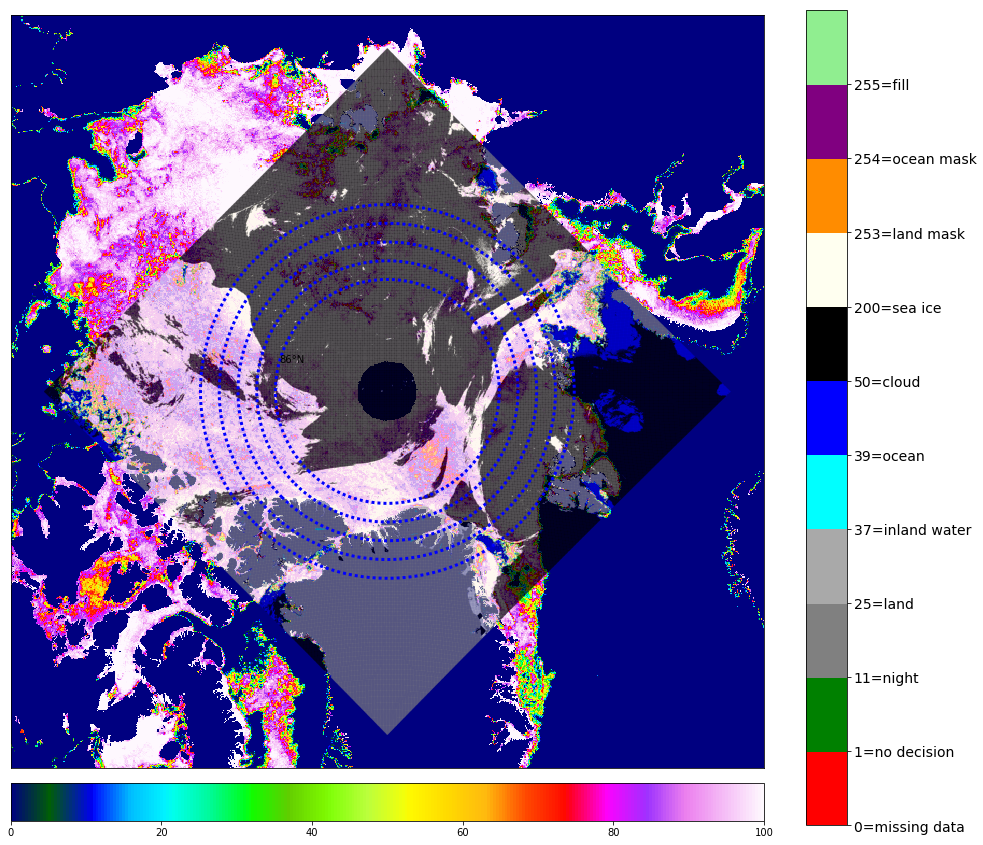

In [28]:
fig = plt.figure(figsize=(15,15))
m = Basemap(projection='npstere',boundinglat=70,lon_0=-45,resolution='l') 

# m.drawcoastlines()
# m.fillcontinents(color='silver',lake_color='aqua');


x0,y0 = m(lon[0][0],lat[0][0])
x1,y1 = m(lon[6][1],lat[6][1])
x2,y2 = m(lon[8][2],lat[8][2])
x3,y3 = m(lon[2][3],lat[2][3])

xi,yi = m(loni,lati)
x6,y6 = m(Lon6,Lat6)

im1 = m.pcolormesh(Lon6,Lat6,SIC,cmap = 'gist_ncar', latlon = True)
cba = m.colorbar(im1, location='bottom',spacing='uniform')
cbar.set_label('Sea Ice Concentration (%)',fontsize = 16)

z2_f = np.flip(z2,0)
im2 = m.pcolormesh(loni,lati,z2_f, cmap = cmap, alpha = 0.02, norm = norm, latlon=True)
cbb = plt.colorbar(im2,ticks = np.arange(0,11,1),orientation='vertical',fraction=0.05)
cbb.ax.set_yticklabels(surface_type,fontsize = 14) 
cbb.solids.set(alpha=1)

# 绘制纬线
para=m.drawparallels(np.arange(80,85,1),color='blue',fontsize=14,\
                linewidth=3,latmax=84)

lon=-150
for lat in np.array([84]):
    x,y = m(lon, lat)
    plt.text(x,y,str(lat+2)[:2]+'°N',color='black')
# 绘制经线
# merid=m.drawmeridians(np.arange(-180.,181.,1.),latmax=89,fontsize=14)


In [330]:
print(x0,y0)
# print(x1,y1)
# print(x2,y2)
# print(x3,y3)
# xi,yi

1365476.4710447418 3414207.0022622123


In [36]:
print(xi.min(),xi.max())
print(yi.min(),yi.max())

1366136.9449275844 5462277.05959684
1365476.4710447418 5461616.596577281
[]


In [47]:
# 1792/3*2
1216/3*2

810.6666666666666

In [1]:
grid_x = Lon6[597:1195,405:811]
grid_y = Lat6[597:1195,405:811]

NameError: name 'Lon6' is not defined

In [49]:
from scipy.interpolate import griddata

In [335]:
loni.shape

(2853, 2853)

In [50]:
row = 2853
col = 2853
points=np.zeros((row*col,2))
points[:,0]=np.reshape(loni,row*col,1)
points[:,1]=np.reshape(lati,row*col,1)
values=np.reshape(z2,row*col,1)

# filename = "C:/Users/kathy/research/Sea-ice-concentration/data/UB/sic/asi-AMSR2-n6250-20180905-v5.4.nc"
# x2,y2,z2 = ReadXYZ(filename)
# grid_x,grid_y = np.meshgrid(x2,y2)
# grid_x,grid_y = Lon6,Lat6

In [51]:
from scipy.interpolate import griddata
grid_z = griddata(points,values,(grid_x,grid_y),method='nearest')
# grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')

KeyboardInterrupt: 

In [ ]:
plt.imshow(grid_z)

In [327]:
import scipy.ndimage

In [331]:
zz = scipy.ndimage.zoom(z2,zoom = 1/2)
print('Current grids:',zz.shape)
print('Original grids:',z2.shape)
zz

Current grids: (1426, 1426)
Original grids: (2853, 2853)


array([[6., 6., 6., ..., 6., 6., 6.],
       [6., 6., 6., ..., 6., 6., 6.],
       [6., 6., 6., ..., 6., 6., 6.],
       ...,
       [3., 3., 3., ..., 5., 5., 5.],
       [3., 3., 3., ..., 5., 5., 5.],
       [3., 3., 3., ..., 5., 5., 5.]])

In [239]:
os.chdir('C:/Users/kathy/research/Sea-ice-concentration/data/NSIDC/sic/')
print(os.getcwd())
# os.listdir()

f = []
for file in os.listdir(os.getcwd()):
    if file.endswith(".hdf"):
        f.append(os.path.join(os.getcwd(), file)) 
        print(os.path.join(os.getcwd(), file))

C:\Users\kathy\research\Sea-ice-concentration\data\NSIDC\sic
C:\Users\kathy\research\Sea-ice-concentration\data\NSIDC\sic\AMSR_E_L3_SeaIce12km_V15_20080701.hdf
C:\Users\kathy\research\Sea-ice-concentration\data\NSIDC\sic\AMSR_E_L3_SeaIce12km_V15_20080702.hdf


In [240]:
filename = f[0]

hdf_obj = SD.SD(filename,SD.SDC.READ)
key = hdf_obj.datasets().keys()
print (key, '\n')

dict_keys(['SI_12km_NH_18V_ASC', 'SI_12km_NH_18V_DSC', 'SI_12km_NH_18V_DAY', 'SI_12km_NH_18H_ASC', 'SI_12km_NH_18H_DSC', 'SI_12km_NH_18H_DAY', 'SI_12km_NH_23V_ASC', 'SI_12km_NH_23V_DSC', 'SI_12km_NH_23V_DAY', 'SI_12km_NH_23H_ASC', 'SI_12km_NH_23H_DSC', 'SI_12km_NH_23H_DAY', 'SI_12km_NH_36V_ASC', 'SI_12km_NH_36V_DSC', 'SI_12km_NH_36V_DAY', 'SI_12km_NH_36H_ASC', 'SI_12km_NH_36H_DSC', 'SI_12km_NH_36H_DAY', 'SI_12km_NH_89V_ASC', 'SI_12km_NH_89V_DSC', 'SI_12km_NH_89V_DAY', 'SI_12km_NH_89H_ASC', 'SI_12km_NH_89H_DSC', 'SI_12km_NH_89H_DAY', 'SI_12km_NH_ICECON_ASC', 'SI_12km_NH_ICECON_DSC', 'SI_12km_NH_ICECON_DAY', 'SI_12km_NH_ICEDIFF_ASC', 'SI_12km_NH_ICEDIFF_DSC', 'SI_12km_NH_ICEDIFF_DAY', 'SI_12km_NH_SNOWDEPTH_5DAY', 'SI_12km_SH_18V_ASC', 'SI_12km_SH_18V_DSC', 'SI_12km_SH_18V_DAY', 'SI_12km_SH_18H_ASC', 'SI_12km_SH_18H_DSC', 'SI_12km_SH_18H_DAY', 'SI_12km_SH_23V_ASC', 'SI_12km_SH_23V_DSC', 'SI_12km_SH_23V_DAY', 'SI_12km_SH_23H_ASC', 'SI_12km_SH_23H_DSC', 'SI_12km_SH_23H_DAY', 'SI_12km_SH_36V

In [218]:
from pyproj import Proj, transform

"Convert coordinate system 2"
'''EPSG 4326 to EPSG 3411'''
def ConCoor(x1,y1,z1):
    inProj = Proj(init='epsg:4326')
    outProj = Proj(init='epsg:3411')
#     outProj = Proj('+proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +k=1 +x_0=0 +y_0=0 +a=6378273 +b=6356889.449 +units=m +no_defs')
    x2,y2,z2 = transform(inProj,outProj,x1,y1,z1)
#     x2,y2 = transform(inProj,outProj,x1,y1)
    #print(x2,y2)

    return x2,y2,z2
# return x2,y2

x2,y2,z2 = ConCoor(loni,lati,stitch)


In [272]:
x2

array([[ 0.00000000e+00,  6.99374686e+02,  1.39873704e+03, ...,
         1.99318455e+06,  1.99390147e+06,  1.99461842e+06],
       [-6.99374686e+02,  0.00000000e+00,  6.99362353e+02, ...,
         1.99246761e+06,  1.99318452e+06,  1.99390146e+06],
       [-1.39873704e+03, -6.99362353e+02,  0.00000000e+00, ...,
         1.99175070e+06,  1.99246760e+06,  1.99318452e+06],
       ...,
       [-1.99318455e+06, -1.99246761e+06, -1.99175070e+06, ...,
         2.43840400e-10,  6.99351304e+02,  1.39871494e+03],
       [-1.99390147e+06, -1.99318452e+06, -1.99246760e+06, ...,
        -6.99351304e+02,  2.44015988e-10,  6.99363629e+02],
       [-1.99461842e+06, -1.99390146e+06, -1.99318452e+06, ...,
        -1.39871494e+03, -6.99363629e+02,  2.44191587e-10]])

In [250]:
print(z2.shape)

(2853, 2853)


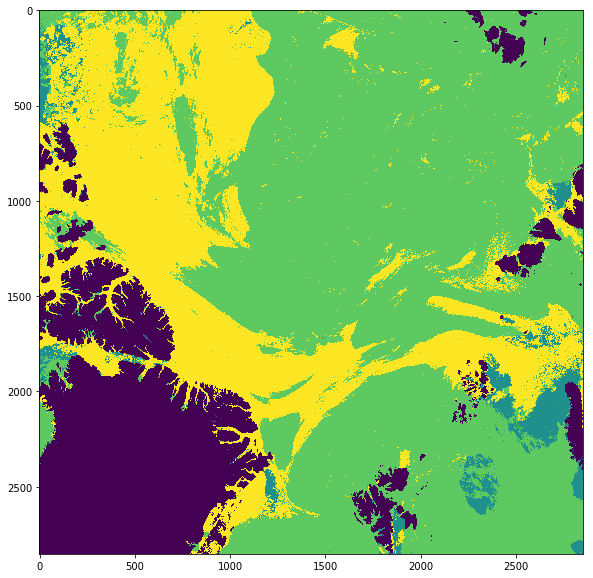

In [310]:
fig = plt.figure(figsize=(10,10))

z2_f = np.flip(z2,0)
plt.imshow(z2)
# plt.pcolormesh(x2/1000.,y2/1000.,z2_f, cmap = cmap, norm = norm)

In [214]:
temp = stitch
# temp = np.ma.masked_where(lati <= 84, temp)
temp = np.ma.masked_where(temp == 6, temp)

AttributeError: 'Basemap' object has no attribute 'gridline'

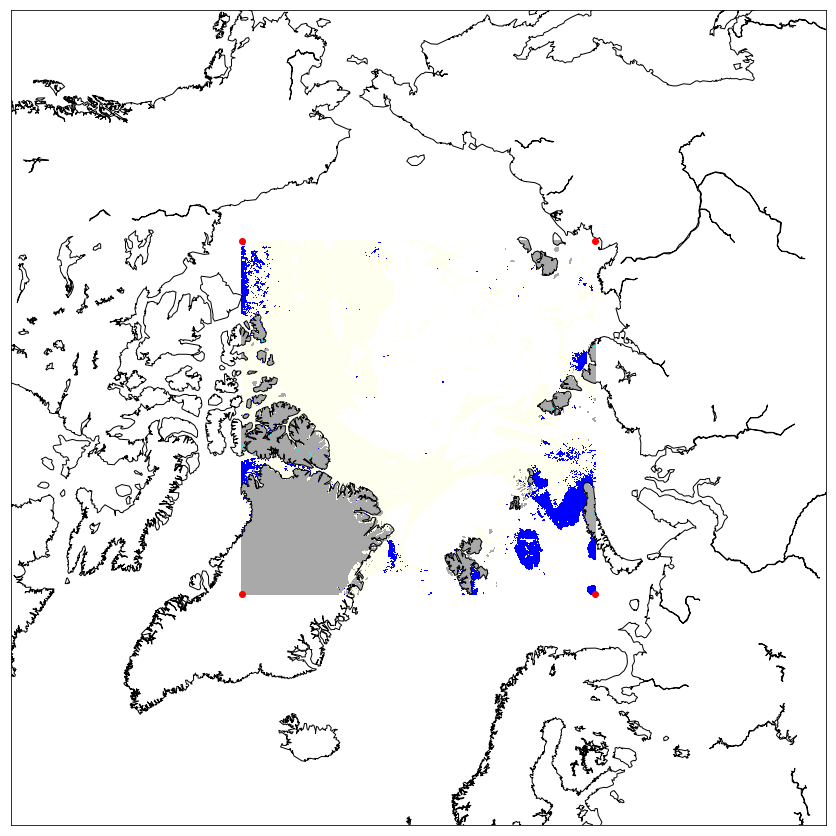

In [216]:
fig = plt.figure(figsize=(15,15))
m = Basemap(resolution='l',projection='nplaea',boundinglat=60.,lon_0=0.)

m.drawcoastlines()
# m.fillcontinents(color='silver',lake_color='aqua')

    
x0,y0 = m(lon[0][0],lat[0][0])
m.plot(x0,y0,'ro')
x1,y1 = m(lon[6][1],lat[6][1])
m.plot(x1,y1,'ro')
x2,y2 = m(lon[8][2],lat[8][2])
m.plot(x2,y2,'ro')
x3,y3 = m(lon[2][3],lat[2][3])
m.plot(x3,y3,'ro')

# plt.text(x0,y0,str(int(lat[i][0]))+'°, '+str(int(lon[i][0]))+'°',fontsize=14)
# plt.text(x1,y1,str(int(lat[i][1]))+'°, '+str(int(lon[i][1]))+'°',fontsize=14)
# plt.text(x2,y2,str(int(lat[i][2]))+'°, '+str(int(lon[i][2]))+'°',fontsize=14)
# plt.text(x3,y3,str(int(lat[i][3]))+'°, '+str(int(lon[i][3]))+'°',fontsize=14)


'''
Interpolating and creating (xi,yi) of each grid cell
'''
# xi_tm = np.linspace(x0,x1,951)
# yi_tm = np.linspace(y3,y0,951)

xi_tm = np.arange(x0,x1,1002.7010)
yi_tm = np.arange(y3,y0,1002.7010)
xi_tm,yi_tm = np.meshgrid(xi_tm,yi_tm)

'''
Inverse process to get (loni,lati) of each grid cell
'''
loni,lati = m(xi_tm,yi_tm, inverse=True)

# print(yi_tm.min(),lati.min(),lati.max())
# print(xi_tm.min(),loni.min(),loni.max())

stitch_f = np.flip(temp,0)
m.pcolormesh(xi_tm,yi_tm,stitch_f,cmap = cmap, norm = norm)

# m.pcolormesh(lon,lat, SIbR,cmap = cmap, norm = norm, latlon=True)
;